In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
wcds_data = '~/saved_codes/tfExample/datafiles/breast-cancer-wisconsin-data/data.csv'

In [ ]:
df_wcds_dat = pd.read_csv(wcds_data, sep=',')
df_wcds_dat.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
y_original = df_wcds_dat.diagnosis
# df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df_wcds_dat.diagnosis = [1 if each == "M" else 0 for each in df_wcds_dat.diagnosis]

In [6]:
encoded_y = df_wcds_dat.diagnosis
encoded_y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [7]:
df_wcds_dat.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
x_data = df_wcds_dat.drop(['Unnamed: 32', 'id'], axis=1) #, inplace=True)
# df_wcds_dat.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
# x_data = df_wcds_dat.drop(['Unnamed: 32', 'id', 'diagnosis'], axis=1)

In [9]:
# opt_feats = df_wcds_dat[1, 2, 3, 13, 21, 22, 23]

In [10]:
x_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# format the data using minmax scaler
minmax_scaling = preprocessing.MinMaxScaler()
x_data0 = pd.DataFrame(x_data)
x_scaled0 = minmax_scaling.fit_transform(x_data0)
x_scaled00 = pd.DataFrame(x_scaled0)

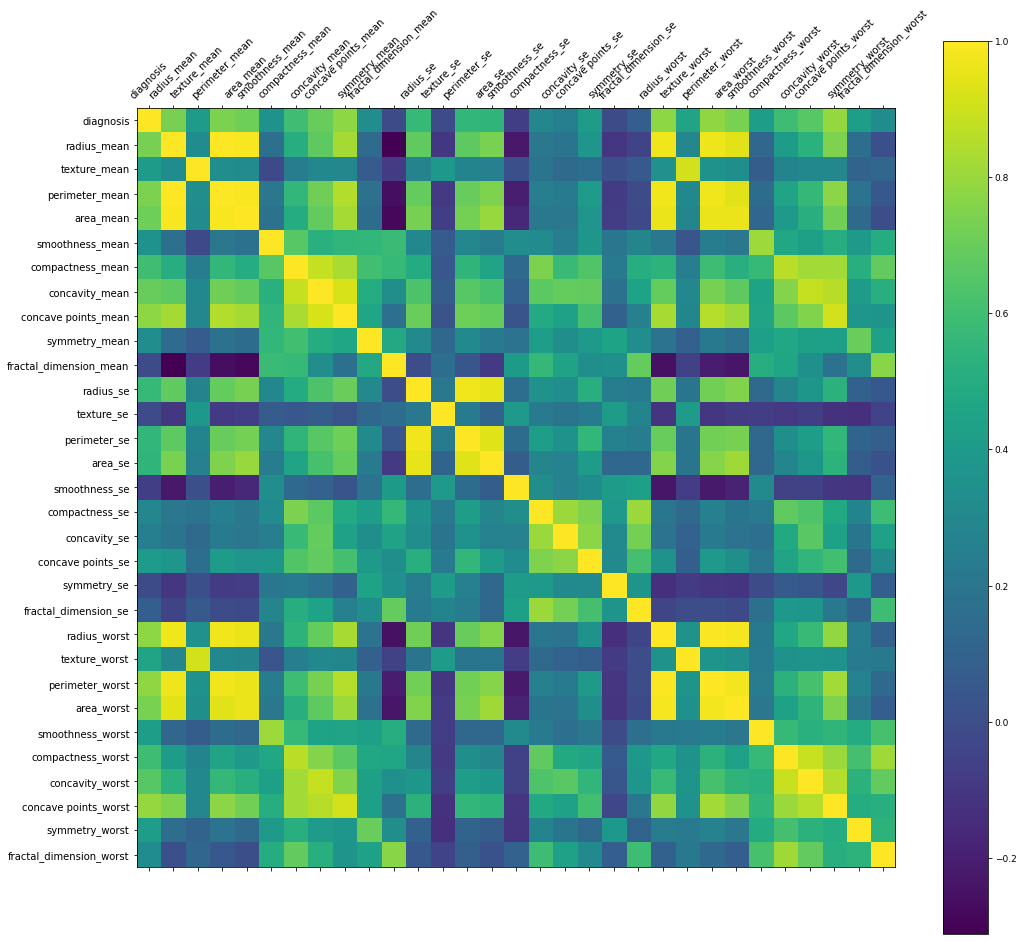

In [12]:
f3 = plt.figure(figsize=(17, 16))
plt.matshow(x_scaled00.corr(), fignum=f3.number)
plt.xticks(range(x_scaled00.shape[1]), x_data.columns, fontsize=10, rotation=45)
plt.yticks(range(x_scaled00.shape[1]), x_data.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=9)
f3.savefig('~/finalResults/corrvisuals/corr30feats.pdf')
plt.show()

In [13]:
# Generate statistics
# df_wcds_dat.describe()

In [14]:
x_data_new = x_data.drop(['diagnosis'], axis=1)
#x_data_new.columns

In [15]:
opt_feats = x_data_new.iloc[:, [1, 2, 3, 13, 21, 22, 23]]

In [16]:
opt_feats.shape

(569, 7)

In [17]:
# format the data using minmax scaler
minmax_scaling = preprocessing.MinMaxScaler()
dat_opt_feats = pd.DataFrame(opt_feats)
x_scaled_feats = minmax_scaling.fit_transform(dat_opt_feats)
x_scaled00_feats = pd.DataFrame(x_scaled_feats)

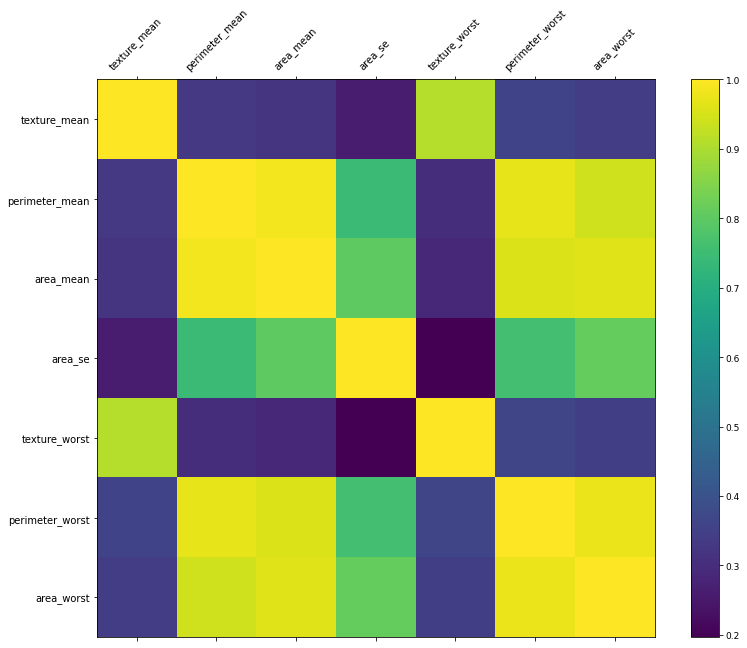

In [18]:
f4 = plt.figure(figsize=(13, 10))
plt.matshow(x_scaled00_feats.corr(), fignum=f4.number)
plt.xticks(range(x_scaled00_feats.shape[1]), opt_feats.columns, fontsize=10, rotation=45)
plt.yticks(range(x_scaled00_feats.shape[1]), opt_feats.columns, fontsize=10)
cb = plt.colorbar()
f4.savefig('~/finalResults/corrvisuals/corr7feats.pdf')
cb.ax.tick_params(labelsize=9)
plt.show()

In [19]:
labels = encoded_y.values

In [20]:
# format the data using minmax scaler
minmax_scaling = preprocessing.MinMaxScaler()
x_data_new = pd.DataFrame(x_data_new)
x_scaled0_new = minmax_scaling.fit_transform(x_data)
x_scaled00_new = pd.DataFrame(x_scaled0)

In [21]:
# divide data into different classes
from sklearn.model_selection import train_test_split

array_opt = opt_feats.values

# Define the independent variables as features.
features_opt = array_opt# [:,1:]

# Define the target (dependent) variable as labels.
labels = encoded_y.values # array[:,0]

# Create a train/test split using 30% test size.
features_train_opt, features_test_opt, labels_train_opt, labels_test_opt = train_test_split(features_opt,labels, test_size=0.3, random_state=42)                                                                                                                                                   
# Check the split printing the shape of each set.
print(features_train_opt.shape, labels_train_opt.shape)
print(features_test_opt.shape, labels_test_opt.shape)

(398, 7) (398,)
(171, 7) (171,)


In [22]:
# divide data into different classes
from sklearn.model_selection import train_test_split

array = x_data_new.values

# Define the independent variables as features.
features = array# [:,1:]

# Define the target (dependent) variable as labels.
labels = encoded_y.values # array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,labels, test_size=0.3, random_state=42)                                                                                                                                                   
# Check the split printing the shape of each set.
print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

(398, 30) (398,)
(171, 30) (171,)


In [23]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(features_train_opt, labels_train_opt)
acc = lr.score(features_test_opt, labels_test_opt)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 95.32%


/home/nath/miniconda3/envs/tfgpu24/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(features_train_opt, labels_train_opt)
prediction = knn.predict(features_test_opt)

print("{} NN Score: {:.2f}%".format(2, knn.score(features_test_opt, labels_test_opt)*100))

2 NN Score: 94.15%


In [25]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(features_train_opt, labels_train_opt)

acc = svm.score(features_test_opt, labels_test_opt)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 94.15%


In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(features_train_opt, labels_train_opt)

acc = nb.score(features_test_opt, labels_test_opt)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 95.32%


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(features_train_opt, labels_train_opt)

acc = dtc.score(features_test_opt, labels_test_opt)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 91.81%


In [28]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(features_train_opt, labels_train_opt)

acc = rf.score(features_test_opt, labels_test_opt)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 95.91%


In [29]:
import lightgbm as lgb

d_train = lgb.Dataset(features_train_opt, label = labels_train_opt)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(features_test_opt)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, labels_test_opt)

y_pred_train = clf.predict(features_test_opt)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
acc = rf.score(features_test_opt, labels_test_opt)*100
accuracies['Light GBM'] = acc
#cm_train = confusion_matrix(y_pred_train[0,:], labels_train_opt[:,0])
#print()
#print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(labels_train_opt)))
#print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(labels_test_opt)))

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
# applying XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(features_train_opt, labels_train_opt)
y_pred = xg.predict(features_test_opt)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, labels_test_opt)

y_pred_train = xg.predict(features_train_opt)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
acc = xg.score(features_test_opt, labels_test_opt)*100
accuracies['Xboost Classifier'] = acc

In [ ]:
accuracies

{'Logistic Regression': 95.32163742690058,
 'SVM': 94.15204678362574,
 'Naive Bayes': 95.32163742690058,
 'Decision Tree': 92.39766081871345,
 'Random Forest': 95.90643274853801,
 'Light GBM': 95.90643274853801,
 'Xboost Classifier': 95.90643274853801}

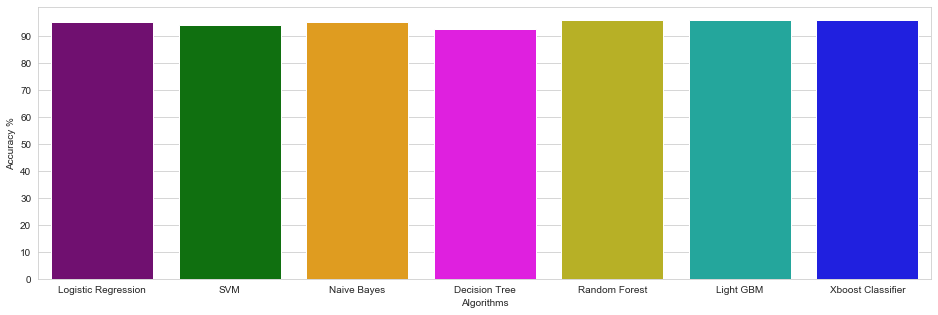

In [ ]:
import seaborn as sns
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE", "blue"]

sns.set_style("whitegrid")
g0=plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
g0.savefig('~/finalResults/classifiers/comparisonswcds.eps', format='eps', dpi=800)
g0.savefig('~/finalResults/classifiers/comparisonswcds.pdf')
plt.show()

In [ ]:
# Predicted values
y_head_lr = lr.predict(features_test_opt)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(features_train_opt, labels_train_opt)
y_head_knn = knn3.predict(features_test_opt)
y_head_svm = svm.predict(features_test_opt)
y_head_nb = nb.predict(features_test_opt)
y_head_dtc = dtc.predict(features_test_opt)
y_head_rf = rf.predict(features_test_opt)
y_head_xg = xg.predict(features_train_opt)
y_head_lgb = clf.predict(features_test_opt)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(labels_test_opt,y_head_lr)
cm_knn = confusion_matrix(labels_test_opt,y_head_knn)
cm_svm = confusion_matrix(labels_test_opt,y_head_svm)
cm_nb = confusion_matrix(labels_test_opt,y_head_nb)
cm_dtc = confusion_matrix(labels_test_opt,y_head_dtc)
cm_rf = confusion_matrix(labels_test_opt,y_head_rf)
#cm_xg = confusion_matrix(labels_test_opt,y_head_xg)
#cm_lgb = confusion_matrix(labels_test_opt,y_head_lgb)

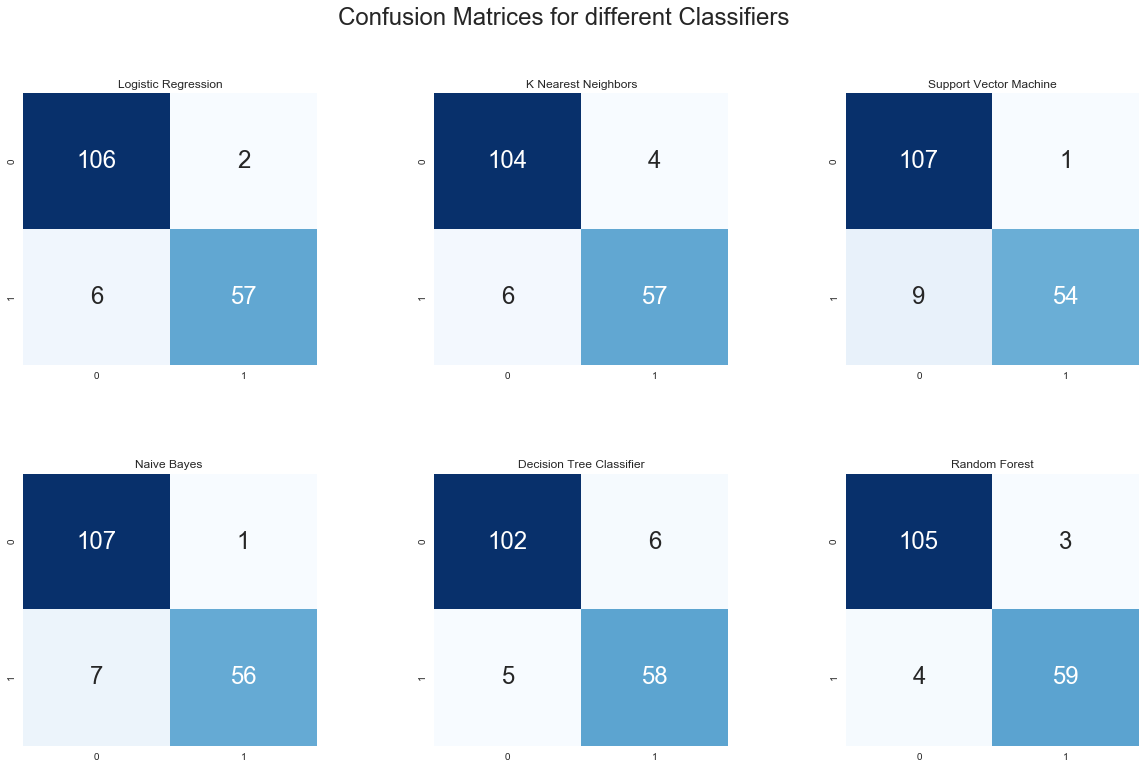

In [ ]:
g1=plt.figure(figsize=(20,12))

g1.suptitle("Confusion Matrices for different Classifiers", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
ax=sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax.set_ylim(2.0, 0)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors")
ax1=sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax1.set_ylim(2.0, 0)

plt.subplot(2,3,3)
plt.title("Support Vector Machine")
ax2=sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax2.set_ylim(2.0, 0)

plt.subplot(2,3,4)
plt.title("Naive Bayes ")
ax3=sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax3.set_ylim(2.0, 0)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier")
ax4=sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
ax4.set_ylim(2.0, 0)

plt.subplot(2,3,6)
plt.title("Random Forest")
ax5=sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
# check current axes using:
# ax.get_ylim()
ax5.set_ylim(2.0, 0)
g1.savefig('~/finalResults/classifiers/allcmatrices.eps', format='eps', dpi=600)
g1.savefig('~/finalResults/classifiers/allcmatrices_1.pdf')

plt.show()

K-NN was chosen amongst other algorithms (e.g. Support Vector Machines, Decision Trees and Naive Bayes), because it is quite fast and produces acceptable results. The speed of K-NN can be explained by the fact that this algorithm is a lazy learner and does not do much during training process unlike other classifiers that build the models. The performance of K-NN will be examined tuning the algorithm and applying various preprocessing steps.
Evaluation of the algorithm

Accuracy, i.e. the fraction of correct predictions is typically not enough information to evaluate a model. Although it is a starting point, it can lead to invalid decisions. Models with high accuracy may have inadequate precision or recall scores. For this reason the evaluation metrics that were also assessed are:

    Precision or the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0. In our study case, precision is when the algorithm guesses that a cell is malignant and actually measures how certain we are that this cell is a true malignant. For example, a precision of 0.9 means that if the model predicts 100 malignant cells, the 90 of them are malignant and the rest 10 are benign (false).
    Recall or the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0. In context to the study, recall shows how well our identifier can find the malignant cells. For example, a low recall score of 0.8 indicates that our identifier finds only 80% of all the real malignant cells in the prediction. The rest 20% of real malignant cells will not be found by the diagnosis based on this algorithm, something that is unacceptable.
    F1 score, a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 x (precision x recall) / (precision + recall).


In [ ]:
#labels
opt_confusion_matrix = []

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    clf = KNeighborsClassifier()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clf.fit(features_train, labels_train)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions = clf.predict(features_test)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy = clf.score(features_test, labels_test)
    report = classification_report(labels_test, predictions)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy))
    print("\n", report)
    print(confusion_matrix(labels_test, predictions))

print_ml_results()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from time import time

def print_ml_results():
    t0 = time()

    # Create classifier.
    clfx = KNeighborsClassifier()

    # Fit the classifier on the training features and labels.
    t0 = time()
    clfx.fit(features_train_opt, labels_train_opt)
    print("Training time:", round(time()-t0, 3), "s")

    # Make predictions.
    t1 = time()
    predictions_opt = clfx.predict(features_test_opt)
    print("Prediction time:", round(time()-t1, 3), "s")

    # Evaluate the model.
    accuracy_opt = clfx.score(features_test_opt, labels_test_opt)
    report_opt = classification_report(labels_test_opt, predictions_opt)

    # Print the reports.
    print("\nReport:\n")
    print("Accuracy: {}".format(accuracy_opt))
    print("\n", report_opt)
    print(confusion_matrix(labels_test_opt, predictions_opt))

print_ml_results()



    The algorithm will be tuned to achieve an improved performance, especially a better recall score for the malignant class, since 90% can be considered a low recall score in this case.

Remove Highly Correlated Features and Run Again

Investigate if removing manually features with a correlation higher than 0.8, can benefit the algorithm performance, although later this will be handled automatically by dimensionality reduction.


In [ ]:
df_new = x_data[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
            'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
            'radius_se', 'texture_se', 'smoothness_se',
            'compactness_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'concavity_worst', 'symmetry_worst',
            'fractal_dimension_worst']]

array = df_new.values

# Define the independent variables as features.
features_new = array[:,1:]

# Define the target (dependent) variable as labels.
labels_new = array[:,0]

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features_new, labels_new, \
                                                                            test_size=0.3, random_state=42)

print_ml_results()




There is a significant decrease in algorithm's accuracy and recall mostly for the malignant class. It's difficult to select manually the best features especially for datasets with many features correlated. Sometimes, ambiguity can occur when three or more variables are correlated. For example, if feature 1 is correlated with feature 2, while feature 2 is correlated with feature 3 but not feature 1, which one is better to remove? To resolve this automatically, dimensionality reduction methods are used such as Principal Component Analysis.
Cross Validation

Train/test split has a lurking danger if the split isn't random and when one subset of our data has only observations from one class, i.e. our data are imbalanced. This will result in overfitting. To avoid this, cross validation is applied. There are several cross validation methods such as K-Fold and Stratified K-Fold.

In K-Fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is the increased accuracy because all observations are used for both training and validation, and each observation is used for validation exactly once.

If the original data comes in some sort of sorted shape, a shuffle of the order of the data points is necessary before splitting them up into folds. This can be done in KFold(), setting the shuffle parameter to True. If there are concerns about class imbalance, then the StratifiedKFold() class should be used instead. Where KFold() assigns points to folds without attention to output class, StratifiedKFold() assigns data points to folds so that each fold has approximately the same number of data points of each output class. This is most useful for when we have imbalanced numbers of data points in the outcome classes (e.g. one is rare compared to the others). For this class as well, it can be used shuffle=True to shuffle the data points' order before splitting into folds.


Scale Features

A common good practice in machine learning is feature scaling, normalization, standardization or binarization of the predictor variables. The main purposes of these methods are two:

    Create comparable features in terms of units, e.g. if there are values in different units, then, the scaled data will be the same.
    Create comparable features in terms of size, e.g. if two variables have vastly different ranges, the one with the larger range may dominate the predictive model, even though it may be less important to the target variable than the variable with the smaller range.

Feature scaling was applied here, since it is useful for algorithms that weigh inputs like regression and neural networks, as well as algorithms that use distance measures like K-NN.


In [ ]:
x_data_new.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)
print("Unscaled data\n", features_train)
print("\nScaled data\n", features_scaled)


Principal Component Analysis (PCA)

PCA is a preprocessing step, which decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. It is used when we need to tackle datasets with a large number of features with different scales, some of which might be correlated. These correlations and the high dimension of the dataset bring a redudancy in the information. Applying PCA, the original features are transformed to linear combinations of new independent variables, which reduce the complexity of the dataset and thus, the computational cost.

Summarizing, the main purpose of principal component analysis is to:

    identify hidden pattern in a data set,
    reduce the dimensionnality of the data by removing the noise and redundancy in the data,
    identify correlated variables



In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

np.set_printoptions(precision=2, suppress=True)

scaler = MinMaxScaler(feature_range=(0,1))
features_scaled_opt = scaler.fit_transform(features_opt)
print("Unscaled data\n", features_train_opt)
print("\nScaled data\n", features_scaled_opt)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(30)
projected = pca.fit_transform(features)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_pca():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

plot_pca()

In [ ]:
projected_scaled = pca.fit_transform(features_scaled)
pca_inversed_data = pca.inverse_transform(np.eye(30))

plot_pca()

In [ ]:
from sklearn.decomposition import PCA

pca_opt = PCA(7)
projected_opt = pca_opt.fit_transform(features_opt)
pca_inversed_data_opt = pca_opt.inverse_transform(np.eye(7))

plt.style.use('seaborn')

def plot_pca_opt():
    plt.figure(figsize=(10, 4))
    plt.plot(pca_inversed_data_opt.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(pca_inversed_data_opt.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 7, 1.0))
    plt.show()

    plt.figure(figsize = (10, 4))
    plt.plot(np.cumsum(pca_opt.explained_variance_ratio_), '--o')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Explained Variance')
    plt.xticks(np.arange(0, 7, 1.0))
    plt.show()

plot_pca_opt()

Applying PCA on the unscaled dataset, it seems that more than 99% of the variance is explained by only one component, which is too good to be true. The feature contribution plot depicts that principal components 3 (area_mean) and 23 (area_worst) dominate the PCA. This is explained by the large variance of area_mean and area_worst (see std values of the Data Exploration section). To avoid this, feature scaling prior to PCA is highly recommended.

In [ ]:
projected_scaled_opt = pca_opt.fit_transform(features_scaled_opt)
pca_inversed_data_opt = pca_opt.inverse_transform(np.eye(7))

plot_pca_opt()

In [ ]:
print(features_train)



After applying scaling before PCA, 5 principal components are required to explain more than 90% of the variance. This shows a better handle on the variation within the dataset.
Univariate Feature Selection

This preprocessing step is used to select the best features based on univariate statistical tests. Most common methods are:

    SelectKBest(), which removes all but the k highest scoring features, and
    SelectPercentile(), which removes all but a user-specified highest scoring percentage of features.

Note: First the dataset must be splitted into train and test sets, since performing feature selection on the whole dataset would lead to prediction bias.


In [ ]:
from sklearn.feature_selection import SelectKBest

select = SelectKBest()
select.fit(features_train, labels_train)
print(features_train.shape)
scores = select.scores_
# Show the scores in a table
feature_scores = zip(x_data.columns.values.tolist(), scores)
ordered_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)
for feature, score in ordered_feature_scores:
    print(feature, score)


Tune the algorithm
Putting it all together with GridSearchCV and Pipeline

Algorithm tuning is a process in which we optimize the parameters that impact the model in order to enable the algorithm to perform with an improved performance. If we don't tune the algorithms well, performance will be poor with low accuracy, precision or recall. Most of the machine learning algorithms contain a set of parameters (hyperparameters), which should be set up adequately to perform the best. While all of the algorithms attempt to set reasonable default hyperparameters, they can often fail to provide optimal results for many real world datasets in practice. To find an optimized combination of hyperparameters, a metric is chosen to measure the algorithm's performance on an independent data set and hyperparameters that maximize this measure are adopted.

Tuning the models is a tedious, time-consuming process and there can sometimes be interactions between the choices we make in one step and the optimal value for a downstream step. Hopefully, there are two simple and easy tuning strategies, grid search and random search. Scikit-learn provides these two methods for algorithm parameter tuning. GridSearchCV() allows us to construct a grid of all the combinations of parameters passing one classifier to pipeline each time, tries each combination, and then reports back the best combination. So, instead of trying numerous values for each tuning parameter, GridSearchCV() will apply all the combinations of parameters - not just vary them independently - avoiding local optima.

The power of GridSearchCV() is that it multiplies out all the combinations of parameters and tries each one, making a k-fold cross-validated model for each combination. Then, we can ask for predictions and parameters from our GridSearchCV() object and it will automatically return to us the best set of predictions, as well as the best parameters.


In [ ]:
#opt_feats.columns.values.tolist()

In [ ]:
from sklearn.feature_selection import SelectKBest

select_opt = SelectKBest()
print(features_train_opt.shape)
print(labels_train_opt.shape)
#select_opt.fit(features_train_opt, labels_train_opt)
#scores_opt = select_opt.scores_
# Show the scores in a table
#feature_scores_opt = zip(opt_feats.columns.values.tolist(), scores_opt)
#ordered_feature_scores_opt = sorted(feature_scores_opt, key=lambda x: x[1], reverse=True)
#print(scores_opt)
#for feature, score in ordered_feature_scores_opt:
#    print(feature, score)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create the scaler.
scaler = MinMaxScaler(feature_range=(0,1))

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(features)

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

# Create a function to find the best estimator.
def get_best_estimator(n_splits):

    t0 = time()

    # Create Stratified ShuffleSplit cross-validator.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=3)

    # Create grid search.
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring=('f1'), cv=sss, refit='f1')

    # Fit pipeline on features_train and labels_train.
    grid.fit(features_train, labels_train)

    # Make predictions.
    predictions = grid.predict(features_test)

    # Test predictions using sklearn.classification_report().
    report = classification_report(labels_test, predictions)

    # Find the best parameters and scores.
    best_parameters = grid.best_params_
    best_score = grid.best_score_

    # Print the reports.
    print("\nReport:\n")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_parameters)
    print(confusion_matrix(labels_test, predictions))
    print("Time passed: ", round(time() - t0, 3), "s")
    
    return grid.best_estimator_

get_best_estimator(n_splits=20)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create the scaler.
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(features_opt)

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

# Create a function to find the best estimator.
def get_best_estimator(n_splits):

    t0 = time()

    # Create Stratified ShuffleSplit cross-validator.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=3)

    # Create grid search.
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring=('f1'), cv=sss, refit='f1')

    # Fit pipeline on features_train and labels_train.
    grid.fit(features_train, labels_train)

    # Make predictions.
    predictions = grid.predict(features_test)

    # Test predictions using sklearn.classification_report().
    report = classification_report(labels_test, predictions)

    # Find the best parameters and scores.
    best_parameters = grid.best_params_
    best_score = grid.best_score_

    # Print the reports.
    print("\nReport:\n")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_parameters)
    print(confusion_matrix(labels_test, predictions))
    print("Time passed: ", round(time() - t0, 3), "s")
    
    return grid.best_estimator_

get_best_estimator(n_splits=20)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create the scaler.
scaler = MinMaxScaler(feature_range=(0,1))

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(features)

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

# Create a function to find the best estimator.
def get_best_estimator(n_splits):

    t0 = time()

    # Create Stratified ShuffleSplit cross-validator.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=3)

    # Create grid search.
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring=('f1'), cv=sss, refit='f1')

    # Fit pipeline on features_train and labels_train.
    grid.fit(features_train, labels_train)

    # Make predictions.
    predictions = grid.predict(features_test)

    # Test predictions using sklearn.classification_report().
    report = classification_report(labels_test, predictions)

    # Find the best parameters and scores.
    best_parameters = grid.best_params_
    best_score = grid.best_score_

    # Print the reports.
    print("\nReport:\n")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_parameters)
    print(confusion_matrix(labels_test, predictions))
    print("Time passed: ", round(time() - t0, 3), "s")
    
    return grid.best_estimator_

get_best_estimator(n_splits=20)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create the scaler.
scaler = MinMaxScaler(feature_range=(0,1))

# Scale down all the features (both train and test dataset).
features = scaler.fit_transform(features_opt)

# Create a train/test split using 30% test size.
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.3,
                                                                            random_state=42)

# Create the classifier.
clf = KNeighborsClassifier()

# Create the pipeline.
pipeline = Pipeline([('reduce_dim', PCA()),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    },
    {
        'reduce_dim': [SelectKBest()],
        'reduce_dim__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

# Create a function to find the best estimator.
def get_best_estimator(n_splits):

    t0 = time()

    # Create Stratified ShuffleSplit cross-validator.
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.3, random_state=3)

    # Create grid search.
    grid = GridSearchCV(pipeline, param_grid=parameters, scoring=('f1'), cv=sss, refit='f1')

    # Fit pipeline on features_train and labels_train.
    grid.fit(features_train, labels_train)

    # Make predictions.
    predictions = grid.predict(features_test)

    # Test predictions using sklearn.classification_report().
    report = classification_report(labels_test, predictions)

    # Find the best parameters and scores.
    best_parameters = grid.best_params_
    best_score = grid.best_score_

    # Print the reports.
    print("\nReport:\n")
    print(report)
    print("Best f1-score:")
    print(best_score)
    print("Best parameters:")
    print(best_parameters)
    print(confusion_matrix(labels_test, predictions))
    print("Time passed: ", round(time() - t0, 3), "s")
    
    return grid.best_estimator_

get_best_estimator(n_splits=20)

In [ ]:
# Build the estimator from PCA and univariate selection.
combined_features = FeatureUnion([('pca', PCA()), ('univ_select', SelectKBest())])

# Do grid search over k, n_components and K-NN parameters.
pipeline = Pipeline([('features', combined_features),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'features__pca': [PCA(iterated_power=7)],
        'features__pca__n_components': n_features_options,
        'features__univ_select__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

get_best_estimator(20)

In [ ]:
# Build the estimator from PCA and univariate selection.
combined_features = FeatureUnion([('pca', PCA()), ('univ_select', SelectKBest())])

# Do grid search over k, n_components and K-NN parameters.
pipeline = Pipeline([('features', combined_features),
                     ('clf', clf)])

# Create the parameters.
n_features_options = [1, 3, 5, 7]
n_neighbors = [2, 4, 6]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

parameters = [
    {
        'features__pca': [PCA(iterated_power=7)],
        'features__pca__n_components': n_features_options,
        'features__univ_select__k': n_features_options,
        'clf__n_neighbors': n_neighbors,
        'clf__algorithm': algorithm
    }]

get_best_estimator(20)

In this study, K-NN algorithm was applied for the diagnosis of the Breast Cancer Wisconsin DataSet. It was found that precision and recall scores can be considerably improved applying the following steps:

    Feature Scaling
    Dimensionality Reduction
    Cross Validation
    Hyperparameter Optimization

For better results more data are required and other algorithms should be used.

In [ ]:
# Cleaning and modifying the data
#data = data.drop('id',axis=1)
#data = data.drop('Unnamed: 32',axis=1)
# Mapping Benign to 0 and Malignant to 1 
#x_data['diagnosis'] = x_data['diagnosis'].map({'M':1,'B':0})
# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(df_wcds_dat.iloc[:,1:32]))
datas.columns = list(df_wcds_dat.iloc[:,1:32].columns)
datas['diagnosis'] = df_wcds_dat['diagnosis']
# Creating the high dimensional feature space X
data_drop = datas.drop('diagnosis',axis=1)
X = data_drop.values

#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

In [ ]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = df_wcds_dat['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [ ]:
#Cluster using Spectral clustering and visualize using Isomap
from sklearn.cluster import SpectralClustering


# Play with gamma to optimize the clustering results
kmns = SpectralClustering(n_clusters=2,  gamma=0.5, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1)
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Spectral clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = df_wcds_dat['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')


In [ ]:
# Cluster using hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
aggC = AgglomerativeClustering(n_clusters=2, linkage='ward')
kY = aggC.fit_predict(X)


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('Hierarchical clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = df_wcds_dat['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')